## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>

I will be exploring 67 years of lego data to develop my skills working with pandas

## 2. Reading Data


In [8]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [4]:
colors.shape

num_colors= sum(colors.name.value_counts())

print(num_colors)



135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [21]:
colors_summary= colors.groupby('is_trans').count()
print(colors_summary)
# Looking at the amount of transparent leggos and non transparent

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


## 5. Explore Lego Sets


  set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12




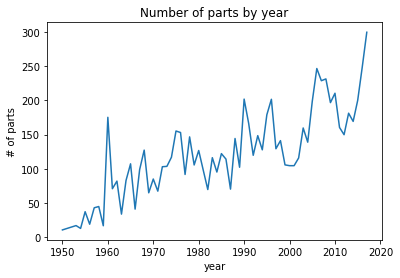

In [15]:
%matplotlib inline
# Read sets data as `sets`
sets= pd.read_csv('datasets/sets.csv')
# Creating a summary of average number of parts by year: `parts_and_themes_by_year`
print(sets.head())
print('\n=======================================\n')
parts_by_year= sets.groupby('year')['num_parts'].mean()
# Plotting trends in average number of parts by year
parts_by_year.plot()
plt.ylabel('# of parts')
plt.title('Number of parts by year')

plt.show()

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [17]:
themes_by_year= sets[['year','theme_id']].groupby('year', as_index=False).agg({"theme_id": pd.Series.count})
print(themes_by_year.head())

   year  theme_id
0  1950         7
1  1953         4
2  1954        14
3  1955        28
4  1956        12


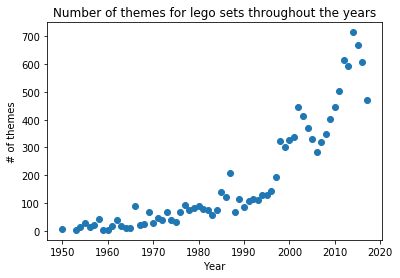

In [20]:
plt.clf()
plt.scatter(x= themes_by_year.year, y = themes_by_year.theme_id)
plt.title('Number of themes for lego sets throughout the years')
plt.ylabel('# of themes')
plt.xlabel('Year')
plt.show()

#### What did we learn? 

So throughout this short examination, we can see that as the years go by, the number of parts per lego set increases. Also as the years go by, the number of themes also increase! Interesting!